## Hyperparams optimization with RandomizedSearchCVand GridSearchCV

## 1. Load libraries and diabetes dataset

In [13]:
import pandas as pd
import numpy as np
import pprint

from sklearn.base import is_classifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# You will need the following dependencies for applying Cross-validation and evaluating the cross-validated score
from sklearn.model_selection import KFold, check_cv, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("datasets/diabetes.csv")
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Data preprocessing 

In [5]:
#data = data.iloc[:, :8].replace(0, np.nan)
data.iloc[:, :8] = data.iloc[:, :8].replace(0, np.NaN)
data.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
# Fill missing values only in Glucose column
print("Glucose mean: {}".format(data.Glucose.mean()))
data[data.Glucose.isna()]

Glucose mean: 121.6867627785059


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1.0,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1.0,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1.0,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5.0,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6.0,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [7]:
data[['Glucose']] = data[['Glucose']].fillna(data.Glucose.mean(), inplace=False)
# Count the number of NaN values in each column
data.isnull().sum()

Pregnancies                 111
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
data.iloc[[75, 182, 342, 349, 502]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1.0,121.686763,48.0,20.0,NaN,24.7,0.140,22,0
182,1.0,121.686763,74.0,20.0,23.0,27.7,0.299,21,0
342,1.0,121.686763,68.0,35.0,NaN,32.0,0.389,22,0
349,5.0,121.686763,80.0,32.0,NaN,41.0,0.346,37,1
502,6.0,121.686763,68.0,41.0,NaN,39.0,0.727,41,1


In [9]:
# Fill missing values with mean in each column
data.fillna(data.mean(), inplace=True)
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
# Split dataset into inputs and outputs
values = data.values
X = values[:,0:8]
y = values[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

### 3. Initialize model and k-fold cross-validator

In [12]:
# Initiate the LR model with random hyperparameters
lr = LogisticRegression(penalty='l2', dual=False, max_iter=1000)

# Pass data to the LR model
lr.fit(X_train, y_train)
print("Score on train data: {:.4}".format(lr.score(X_train, y_train)))
print("Score on test data: {:.4}".format(lr.score(X_test, y_test)))

Score on train data: 0.7938
Score on test data: 0.7323


In [14]:
# Build the k-fold cross-validator
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

result = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross validation score (n_spilts={}): {:.2%}".format(kfold.n_splits, result.mean()))

Cross validation score (n_spilts=5): 78.99%


In [15]:
# Build the check_cv cross-validator
cv = check_cv(cv=5, y=y_train, classifier=is_classifier(lr))
cv_iter = list(cv.split(X_train, y_train))

result = cross_val_score(lr, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross validation score (n_spilts={}): {:.2%}".format(cv.n_splits, result.mean()))

Cross validation score (n_spilts=5): 79.18%


### 4. Use Full Grid Search and Random Grid Search

In [27]:
dual =     [True, False]
max_iter = [300, 400, 500, 700]
C =        [0.001, 0.01, 0.1, 1, 10]

param_grid = dict(dual=dual, max_iter=max_iter, C=C)

grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %.2f%% using %s" % (grid_result.best_score_ * 100, grid_result.best_params_))

Best: 79.18% using {'C': 1, 'dual': False, 'max_iter': 300}


### LogisticRegression

In [43]:
steps = [('normalizer', StandardScaler()), ('classifier', LogisticRegression())]
pipe = Pipeline(steps)

param_grid = {
     #'classifier__solver': ['lbfgs'], 
     'classifier__max_iter': max_iter,
     'classifier__dual': dual,
     'classifier__C': C, 
     #'classifier__alpha': 10.0 ** -np.arange(7, 10), 
     #'classifier__hidden_layer_sizes': np.arange(7, 10)
}

#grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=3, n_jobs=-1)
grid = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, cv=5, n_jobs=-1, random_state=42)
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %.2f%% using %s" % (grid_result.best_score_ * 100, grid_result.best_params_))

Best: 78.99% using {'classifier__max_iter': 400, 'classifier__dual': False, 'classifier__C': 10}


### RandomForestClassifier

In [67]:
param_grid = {'classifier__max_depth':        [int(x) for x in np.linspace(10, 110, num = 11)],# №[6, 9, None], 
              'classifier__n_estimators':     [50, 70, 100, 150],
              'classifier__max_features':     ['auto', 'sqrt'],
              'classifier__criterion':        ['gini', 'entropy'],
              'classifier__bootstrap':        [True, False],
              'classifier__min_samples_leaf': [1, 2, 3, 4]} 

steps = [('normalizer', StandardScaler()), ('classifier', RandomForestClassifier())]
pipe = Pipeline(steps)
grid = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, cv=5, n_jobs=-1, random_state=42)

grid_result = grid.fit(X_train, y_train)
# Summarize results
pprint.pprint("Best: %.2f%% using %s" % (grid_result.best_score_ * 100, grid_result.best_params_), width=40)

('Best: 77.63% using '
 "{'classifier__n_estimators': 100, "
 "'classifier__min_samples_leaf': 3, "
 "'classifier__max_features': 'auto', "
 "'classifier__max_depth': 110, "
 "'classifier__criterion': 'gini', "
 "'classifier__bootstrap': True}")


In [45]:
y_pred = grid.predict(X_test)
grid.score(X_test, y_test)

0.7598425196850394

In [46]:
#clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, max_features='auto', max_depth=30,
#                            criterion='entropy', bootstrap=False)
clf = RandomForestClassifier()
steps = [('normalizer', StandardScaler()), ('classifier', clf)]
pipe = Pipeline(steps)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7559055118110236

In [68]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(estimator=grid, X=X_train, y=y_train, 
                                                              train_sizes=[100, 200, 300, 400], cv=5, 
                                                              n_jobs=5, shuffle=True)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('train_scores_mean=\t{},\nvalidation_scores_mean=\t{}'.format(train_scores_mean, validation_scores_mean))

train_scores_mean=	[0.976      0.977      0.93866667 0.956     ],
validation_scores_mean=	[0.75669141 0.73537026 0.74898153 0.76261184]


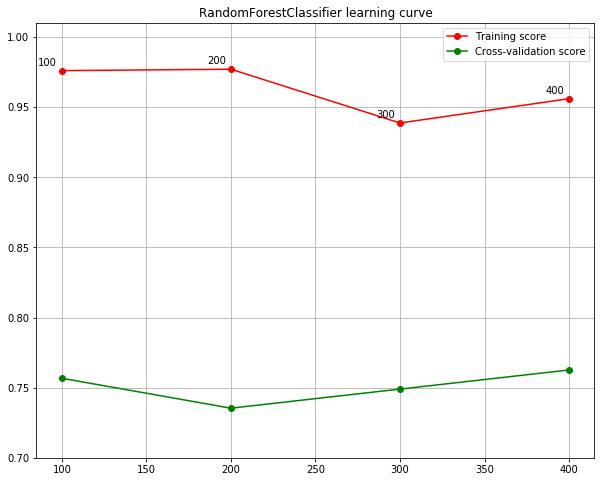

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
ylim = (0.7, 1.01)
ax.set_ylim(*ylim)
ax.set_title('RandomForestClassifier learning curve')
ax.grid(True)
ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
for lx, ly in zip(train_sizes, train_scores_mean):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(lx), xy=(lx,ly), xytext=(-5, 5), ha='right', textcoords='offset points')

ax.legend(loc="best")